# C8. TP : Auto-Encodeur (en Keras, avec CNN)

# Partie 1 : AE-CNN sur données propres

## 1.1 Importation des modules

In [1]:
# On importe les librairies nécessaires

# Le dataset MNIST
from tensorflow.keras.datasets import mnist

# Les librairies TF pour le DL
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense, Conv2D, Conv2DTranspose, MaxPooling2D, Flatten, UpSampling2D, Reshape, BatchNormalization, Dropout, Activation
from tensorflow.keras.models import Model,Sequential

# Les librairies habituelles
import numpy as np
import matplotlib.pyplot as plt

# On configure la session pour l'utilisation de GPU
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#session = tf.Session(config=config)

# On désactive les warnings
import warnings
warnings.filterwarnings('ignore')

## 1.2 Définition de fonctions nécessaires

In [2]:
def MNIST_AE_disp(img_in, img_out, img_idx):

    num_img = len(img_idx)
    plt.figure(figsize=(18, 4))

    for i, image_idx in enumerate(img_idx):
        # on trace l'image originale
        ax = plt.subplot(2, num_img, i + 1)
        plt.imshow(img_in[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # on trace l'image bruitée
        ax = plt.subplot(2, num_img, num_img + i + 1)
        plt.imshow(img_out[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


## 1.3 Chargement et formatage des données (propres)

In [3]:
# On charge les données de MNIST (incluses dans Keras)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# On normalise les valeurs des pixels de [0, 255] à [0, 1]
x_train=x_train.astype('float32')/float(x_train.max())
x_test=x_test.astype('float32')/float(x_test.max())

# POUR LES CNN : On rajoute une dimension pour spécifier qu'il s'agit d'imgages en NdG
x_train=x_train.reshape(len(x_train),x_train.shape[1], x_train.shape[2], 1)
x_test=x_test.reshape(len(x_test),x_test.shape[1], x_test.shape[2], 1)

# On inspecte les dimensions de nos données
# Base d'entrainement : 60,000 images de dimension (28,28)
# Base de test : 10,000 images de dimension (28,28)
print("Training set : ",x_train.shape)
print("Testing set : ",x_test.shape)


11501568/11490434 [==============================] - 0s 0us/step
Training set :  (60000, 28, 28, 1)
Testing set :  (10000, 28, 28, 1)


In [21]:
# Noisy data
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


array([[[[0.        ],
         [0.11842208],
         [0.03368026],
         ...,
         [0.36496416],
         [0.10130536],
         [0.        ]],

        [[0.11783021],
         [0.11097623],
         [0.25977293],
         ...,
         [0.0339019 ],
         [0.        ],
         [0.10046291]],

        [[0.14485298],
         [0.14279407],
         [0.31825167],
         ...,
         [0.        ],
         [0.06334108],
         [0.22345905]],

        ...,

        [[0.08194137],
         [0.41219068],
         [0.        ],
         ...,
         [0.162737  ],
         [0.03486095],
         [0.15329683]],

        [[0.04087375],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.04296394],
         [0.0353669 ]],

        [[0.        ],
         [0.12117641],
         [0.        ],
         ...,
         [0.        ],
         [0.3525488 ],
         [0.4664302 ]]],


       [[[0.2899639 ],
         [0.        ],
         [0.19

## 1.4 Création du réseau CNN

In [5]:
from tensorflow.keras import layers, losses
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


## 1.5 Apprentissage du réseau

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 25s 6ms/step - loss: 0.0108 - val_loss: 0.0017
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0010 - val_loss: 9.4879e-04
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 9.1935e-04 - val_loss: 8.7219e-04
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 8.5183e-04 - val_loss: 7.7592e-04
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 7.5302e-04 - val_loss: 7.1388e-04
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7.1833e-04 - val_loss: 6.9950e-04
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 6.9552e-04 - val_loss: 6.7064e-04
Epoch 10/10
1875/1875 [======

## 1.6 Prédiction par le réseau

In [7]:
# On génère un jeu de 10 images test au hasard
num_images=10
np.random.seed(42)
random_test_images=np.random.randint(x_test.shape[0], size=num_images)

# On détermine l'image encodée et l'image décodée
decoded_img=autoencoder.predict(x_test)
print("decoded shape =", decoded_img.shape)

decoded shape = (10000, 28, 28, 1)


## 1.7 Visualisation

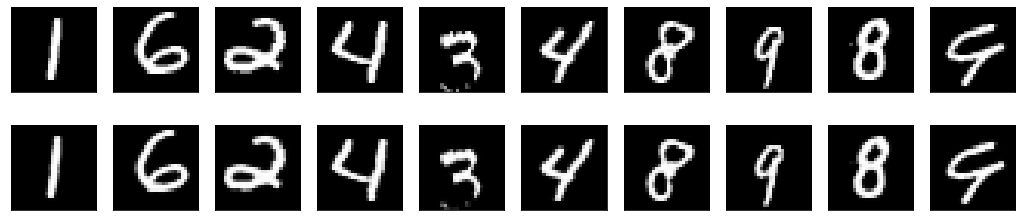

In [8]:
MNIST_AE_disp(x_test, decoded_img, random_test_images)

In [9]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [16]:
# On génère un jeu de 10 images test au hasard
num_images=10
np.random.seed(42)
random_test_images=np.random.randint(x_test_noisy.shape[0], size=num_images)

# On détermine l'image encodée et l'image décodée
decoded_img=autoencoder.predict(x_test_noisy)
print("decoded shape =", decoded_img.shape)

decoded shape = (10000, 28, 28, 1)


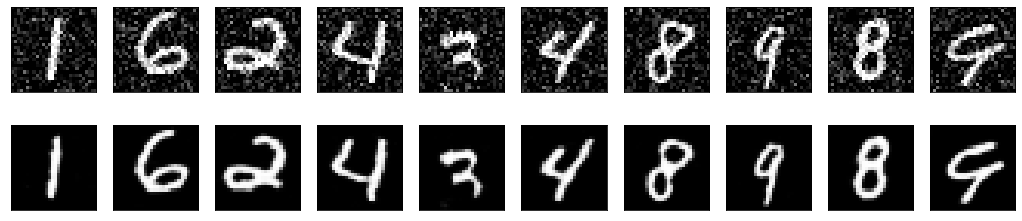

In [22]:
MNIST_AE_disp(x_test_noisy, decoded_img, random_test_images)